In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from mpl_toolkits import mplot3d
from matplotlib import cm


# 1. Class Boundaries and Posterior Probabilitie

Assumption:

- There are $K$ possible classes, with a prior probability $\pi_k$

$$
\pi = [\pi_1, \pi_2, ..., \pi_k]^T
$$

- There are some distribution for $x_n$ conditional on each class $C_k$. Typically, we assume that ==all the $x_n$ come from the same family of distributions==, though the parameters depend on their class.

$$
x_n |  (C_k= 1) \sim N(\mu_1, \sum{_1}) \\
... \\
x_n |  (C_k = k) \sim N(\mu_k, \sum{_k})
$$

Bayes' Rule

$$
P(C_k = k|x_n) = \frac{P(x_n|C_k=k)P(C_k = k)}{P(x_n)}
$$


In [33]:
def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(Ci)
    
    num = np.exp(-0.5 * np.dot((x - m).T, np.dot(Ci, (x - m))))
    den = 2 * np.pi * dC
    
    return num / den


def twoDGaussianPlot(nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)

    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])

    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i, j], Y[i, j]])
            Z[i, j] = gauss2D(xvec, m, C)

    return X, Y, Z


def posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2): 
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)

    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny]) 

    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])

            num = P1*gauss2D(xvec, m1, C1)
            den = P1*gauss2D(xvec, m1, C1) + P2*gauss2D(xvec, m2, C2) 
            Z[i,j] = num / den

    return X, Y, Z


def drawSample(C, m, ax, size=200, c='m'):
    """
    Draw 200 samples from Gaussian Distribution
    """
    L = np.linalg.cholesky(C)

    X = np.random.randn(size, 2) 
    Y = L @ X.T + m[:, np.newaxis]

    ax.scatter(Y[0], Y[1], c=c, s=2)

    return Y

def drawContoursAndSample(C1, m1, C2, m2, ax):
    """
    plot contours and draw 200 samples
    """

    nx, ny = 50, 40
    Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m1, C1)
    Xp2, Yp2, Zp2 = twoDGaussianPlot(nx, ny, m2, C2)

    if not ax:
        fig, ax = plt.subplots()

    ax.grid(True)

    # draw contour
    ax.contour(Xp, Yp, Zp)
    ax.contour(Xp2, Yp2, Zp2)

    # draw sample points
    Y1 = drawSample(C1, m1, ax)
    Y2 = drawSample(C2, m2, ax, c='b')

    return Y1, Y2

In [34]:
m1 = np.array([0, 3])
m2 = np.array([3, 2.5])

## 1.1 Share the same covariance and prior

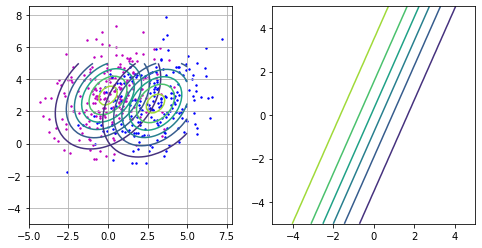

In [36]:
# share the same covariance and prior
C2 = C1 = np.array([[3, 1], [1, 3]])
P2 = P1 = 0.5


# 1. draw Gaussian Sample
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
drawContoursAndSample(C1, m1, C2, m2, ax[0])


# 2. calculate posteriorPlot through Bayes' rules
nx, ny = 50, 40
Xp, Yp, Zp = posteriorPlot(nx, ny, m1, C1, m2, C2,  P1, P2)

# 3. draw contour of posteriorPlot
ax[1].contour(Xp, Yp, Zp)

plt.show()


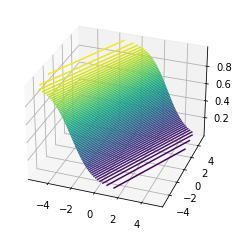

In [38]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(Xp, Yp, Zp, 80, cmap='viridis')
ax.view_init(30, -70)


## 1.2 Different prior but the same covariance


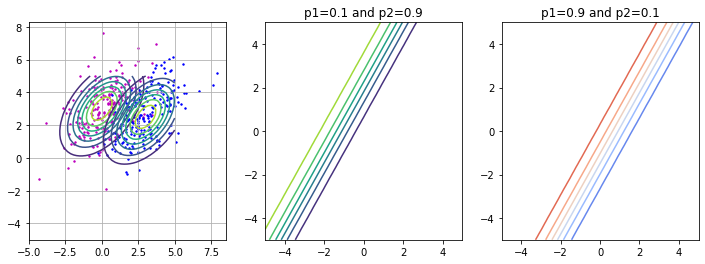

In [46]:
C1 = np.array([[2, 1], [1, 2]])
C2 = np.array([[2, 1], [1, 2]])

P1 = 0.1
P2 = 0.9

P1_1 = 0.9
P2_1 = 0.1

nx, ny = 50, 40
Xp, Yp, Zp = posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)
Xp1, Yp1, Zp1 = posteriorPlot(nx, ny, m1, C1, m2, C2, P1_1, P2_1)

# plot
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

drawContoursAndSample(C1, m1, C2, m2, ax[0])

# draw contour of posterior
ax[1].contour(Xp, Yp, Zp)
ax[1].set_title("p1=0.1 and p2=0.9")

# draw contour of posterior
ax[2].contour(Xp1, Yp1, Zp1,cmap=cm.coolwarm)
ax[2].set_title("p1=0.9 and p2=0.1")

plt.show()

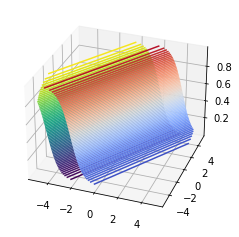

In [45]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.contour3D(Xp, Yp, Zp, 80, cmap='viridis')
ax.contour3D(Xp1, Yp1, Zp1, 80, cmap=cm.coolwarm)

ax.view_init(30, -70)


## 1.3 Different covariance

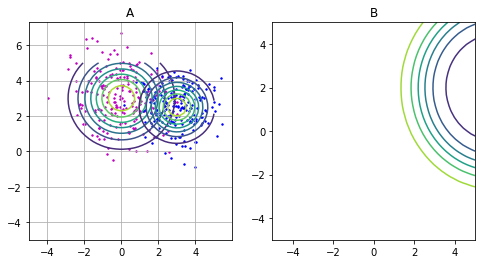

In [47]:
C1 = np.array([[2, 0], [0, 2]])
C2 = np.array([[1, 0], [0, 1]])

P1 = 0.5
P2 = 0.5

nx, ny = 50, 40
Xp, Yp, Zp = posteriorPlot(nx, ny, m1, C1, m2, C2, P1, P2)

# plot
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

drawContoursAndSample(C1, m1, C2, m2, ax[0])
ax[0].set_title("A")

ax[1].contour(Xp, Yp, Zp)
ax[1].set_title("B")

plt.show()

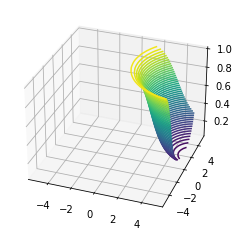

In [48]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.contour3D(Xp, Yp, Zp, 50, cmap='viridis')
ax.view_init(30, -70)


# Fisher Linear Discriminant Analysis

The idea is to maximize a function that will give a small variance within each class but large  separation between class

Projection
$$
y = w^Tx
$$

Projected class center

$$
m_1 = \frac{1}{N_1}\sum _{n \in C_1}  x_n
\\
m_2 = \frac{1}{N_2}\sum _{n \in C_2}  x_n
\\
m_2 - m_1 = w^T( m_2 -  m_1)
\\
$$

The within-class variance

$$
s_k^2 = \sum_{C_k}(w^T x_n - m_k)^2
$$

Fisher criterion

$$
J(w) = \frac{(m_2 - m_1)^2}{s_1^2 + s_2^2}
$$

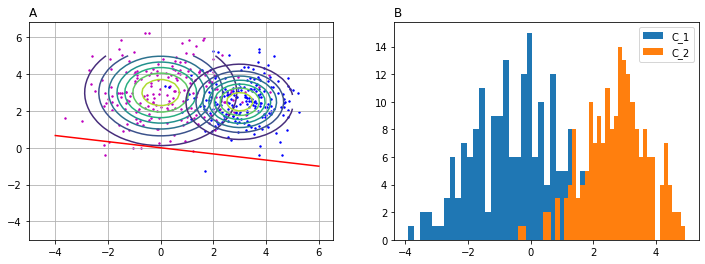

the number of points in each class:  200 200


In [61]:
nx, ny = 50, 40
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m1, C1)
Xp2, Yp2, Zp2 = twoDGaussianPlot(nx, ny, m2, C2)


fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].grid(True)
ax[0].set_title('A', loc='left')

# 1. Plot contours on the two densities.
ax[0].contour(Xp, Yp, Zp)
ax[0].contour(Xp2, Yp2, Zp2)

# 2. Draw 200 samples from each of the two distributions
Y1 = drawSample(C1, m1, ax[0]) # D by N
Y2 = drawSample(C2, m2, ax[0], c='b')

# 3. plot the Fisher Linear discriminant direction
Ci = np.linalg.inv(C1 + C2) 
w = Ci @ (m2 - m1)

x = np.linspace(-4, 6, 10)
ax[0].plot(x, w[1] / w[0] * x, c="r")


# 4. Plot histograms of the distribution of projections
yp1 = Y1.T @ w # N by 1
yp2 = Y2.T @ w

ax[1].hist(yp1, bins=40, label='C_1')
ax[1].hist(yp2, bins=40, label='C_2')
ax[1].set_title('B', loc='left')
plt.legend()
plt.show()

print('the number of points in each class: ', len(yp1), len(yp2))


# ROC

The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

In [85]:
def ROC(yp1, yp2):
    pmin = np.min(np.array( (np.min(yp1), np.min(yp2)) ))
    pmax = np.max(np.array( (np.max(yp1), np.max(yp2)) ))
    print(f'min: {pmin}, max:{pmax}')
    
    iters = 50
    thRange = np.linspace(pmin, pmax, iters)
    ROC = np.zeros((iters, 2)) 
    accuracy = np.zeros(iters)
    
    for i in range(iters):
        threshold = thRange[i]
        
        # C_2 is positive while C_1 is negative, and if y > threshold, then it's positive
        TP = np.sum(yp2 > threshold) / len(yp2)
        FP = np.sum(yp1 > threshold) / len(yp1)

        ROC[i, :] = [ TP, FP ]
        accuracy[i] = np.sum(yp2 > threshold) + np.sum(yp1 < threshold)
        
    auc = -1 * np.trapz(ROC[:, 0], ROC[:, 1])

    return ROC, auc, accuracy, thRange
    

min: -3.9124680142752357, max:4.9098145902221395


0.8825

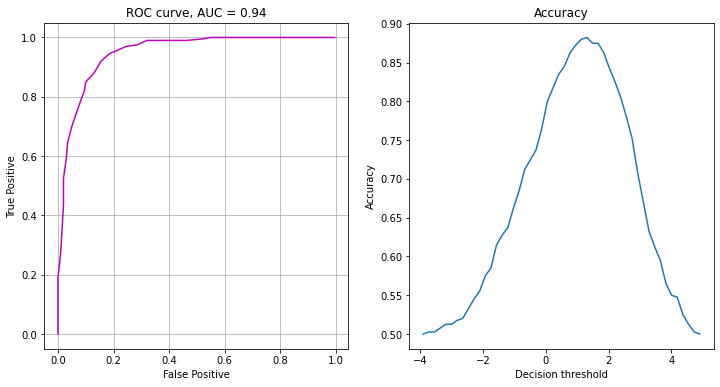

In [87]:
roc, auc, accuracy, thRange = ROC(yp1, yp2)

fig, ax = plt.subplots(1, 2, figsize=(12,6)) 

ax[0].plot(roc[:,1], roc[:,0], c='m') # FP vs TP
ax[0].set_xlabel('False Positive') 
ax[0].set_ylabel('True Positive') 
ax[0].set_title(f'ROC curve, AUC = {auc:.2f}' )
ax[0].grid(True)

ax[1].plot(thRange, accuracy / 400)
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Decision threshold')
ax[1].set_ylabel('Accuracy')
np.max(accuracy) / 400


# Mahalanobis distance


Euclidean Distance

$$
d^2 = (x_1 - x_2)^2 + (y_1 - y_2)^2
$$

Mahalanobis Distance

$$
d^2 = (x-m)^T @ \sum{^{-1}} @ (x-m)
$$


In [88]:
m1 = np.array([0, 3])
m2 = np.array([0, 3])

C1 = np.array([[1, 0], [0, 2]])
C2 = np.array([[1, 1], [1, 2]])


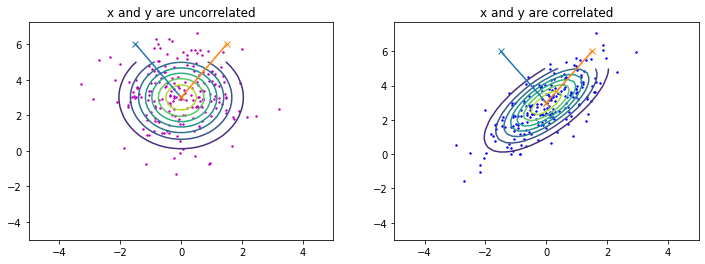

In [95]:
nx, ny = 50, 40
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m1, C1)
Xp2, Yp2, Zp2 = twoDGaussianPlot(nx, ny, m2, C2)

# 1. 
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].contour(Xp, Yp, Zp)
# ax[0].contour(Xp2, Yp2, Zp2)
ax[0].set_title('x and y are uncorrelated')

ax[1].contour(Xp2, Yp2, Zp2)
ax[1].set_title('x and y are correlated')

# 2. Draw 200 samples from each of the two distributions
Y1 = drawSample(C1, m1, ax[0])
# Y2 = drawSample(C2, m2, ax[0], c='b')
Y2 = drawSample(C2, m2, ax[1], c='b')

# random point
v1 = [-1.5, 6]
v2 = [1.5, 6]
ax[0].plot([v1[0], m1[0]], [v1[1], m1[1]], marker="x")
ax[0].plot([v2[0], m1[0]], [v2[1], m1[1]], marker="x")

ax[1].plot([v1[0], m2[0]], [v1[1], m2[1]], marker="x")
ax[1].plot([v2[0], m2[0]], [v2[1], m2[1]], marker="x")

In [100]:
# Euclidean distance
assert (v1 - m1) @ (v1 - m1).T == (v2 - m1) @ (v2 - m1).T

assert (v1 - m1) @ np.linalg.inv(C1) @ (v1 - m1).T == (v2 - m1) @ np.linalg.inv(C1)@ (v2 - m1).T


In [104]:
# Mahalanobis distance

assert (v1 - m2) @ (v1 - m2).T == (v2 - m2) @ (v2 - m2).T

assert (v1 - m2) @ np.linalg.inv(C2) @ (v1 - m2).T != (v2 - m2) @ np.linalg.inv(C2)@ (v2 - m2).T
